<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bdu.10.2.%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.house_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
다중 회귀 분석 알고리즘
(지도 학습 중 다중 회귀 분석을 이용하여 예측 문제를 해결하자)

 다중 선형 알고리즘.
   하나의 독립 변수가 아니라, 여러개의 독립 변수를 사용한 회귀 분석 기법

     - 다중 선형 회귀 분석은 독립 변수가 여러개 이고, 종속 변수가 하나인 선형 회귀


     y = ax1 + bx2 + cx3 + ....

     회귀계수 : a, b, c ...

[ 접근 방법 ]

 1. 종속 변수는 무엇인가 ?  ( median_house_value]

 2. 상관성이 있다고 판단되는 변수들을 선택한 후.

 3. 상관 관계를 확인 한 후.

 4. 회귀 계수를 이용하여 평가 (record )한다.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#선형 회귀 분석을 위한 패키지
from sklearn.linear_model import LinearRegression
#학습 및 테스트 데이터 셋 분리를 위한 패키지
from sklearn.model_selection import train_test_split

In [ ]:
## 2. DATA 불러오기

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

3. DATA 탐색


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()   ## hourse power 결측치 처리 필요 하겠는 것을 확인.
## 20000 전체 DATA 중,   total_bedroom 이 약 200개 결측이 있는데,  1% 수준

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


4. DATA 전처리

In [ ]:
#결측치가 있는 행 전체 제거 (axis = 0 ),  (axis =1 이면 열 전체를 제거)
df = df.dropna(axis = 0 )
#ocean_proximity는 범주형 값으로 분석에서 제외
df = df.drop("ocean_proximity", axis =1 )
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [ ]:
## 변수들 간의 상관 관계 분석
corr = df.corr(method = "pearson")  ## person 상관 계수. person, candal. etc...
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

In [ ]:
## 상관 분석은 두 변수간에 어떤 선형적인 관계를 갖고 있는지를 분석하는 방법이다
## 상관 계수는 0.7이 넘으면 강한 양의 상관 관계, 0.7 이하는 강한 음의 상관 관계로 해석
## 0에 가까우면 상관 관계가 없는 것으로


Text(0.5, 1.0, 'housging data correlation')

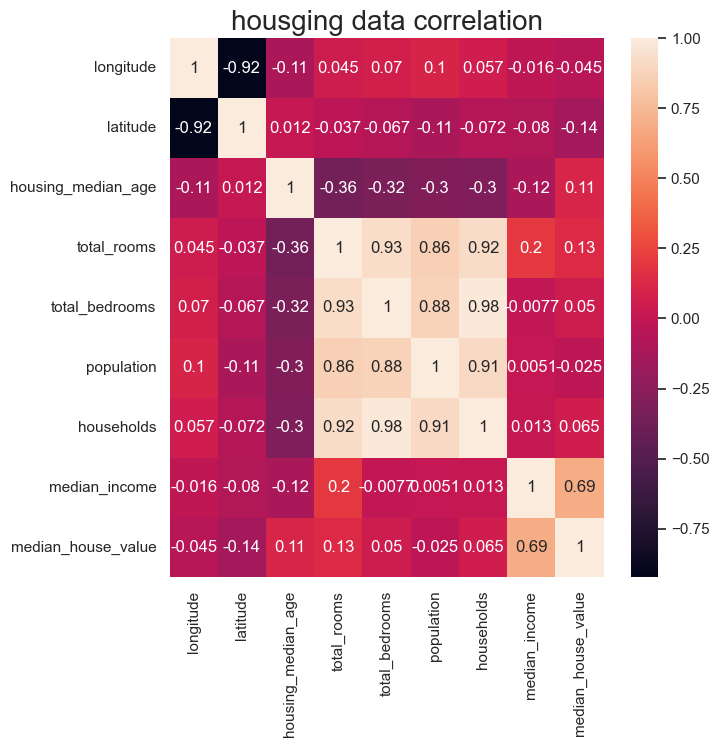

In [ ]:
## 그림으로 그려보자.
import seaborn as sns

sns.set(style="white")

plt.subplots(figsize=(7,7))  // , 로 비교.

sns.heatmap(corr, annot=True)
plt.title("housging data correlation", size=20)

5. 분석 데이터 셋 준비

In [ ]:
# 분석 데이터 셋 준비
# MEDIAN HOUR VALUE를 제외한 나머지를 독립 변수로 함

X = df.drop("median_house_value", axis = 1)
y = df["median_house_value"]

In [ ]:
#분석 데이터셋 분할 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


6. 데이터 분석 수행


In [ ]:
#Linear Regression 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
##학습이 완료된 lr객체에서 테스트 데이터 셋으로 예측
pred = lr.predict(X_test)

In [ ]:
## 회귀식의 기울기와 y 절편을 출력
print("기울기 a:", lr.coef_)
print("y절편 b: ", lr.intercept_)

## 기울기가 8개가 나오는 것을 알 수 있다.

기울기 a: [-4.32286140e+04 -4.31271391e+04  1.10248793e+03 -8.21710211e+00
  1.10718936e+02 -4.28091235e+01  6.30396069e+01  4.02477126e+04]
y절편 b:  -3620819.219137837


7. 성능 평가 및 시각화

In [ ]:
#MODEL 성능 평가 .  테스트 데이터 셋.
from sklearn.metrics import r2_score    ## r2 score : 0 에서 1 사이

score = r2_score(y_test, pred)
print(score)

0.6193365273168066


In [ ]:
## 이 결과를 보면,

In [ ]:
##학습이 완료된 lr 객체에서 학습 데이터셋으로 예측
pred = lr.predict(X_train)
from sklearn.metrics import r2_score
score = r2_score(y_train, pred)
print(score)

0.6435629436623708
